In [1]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [3]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

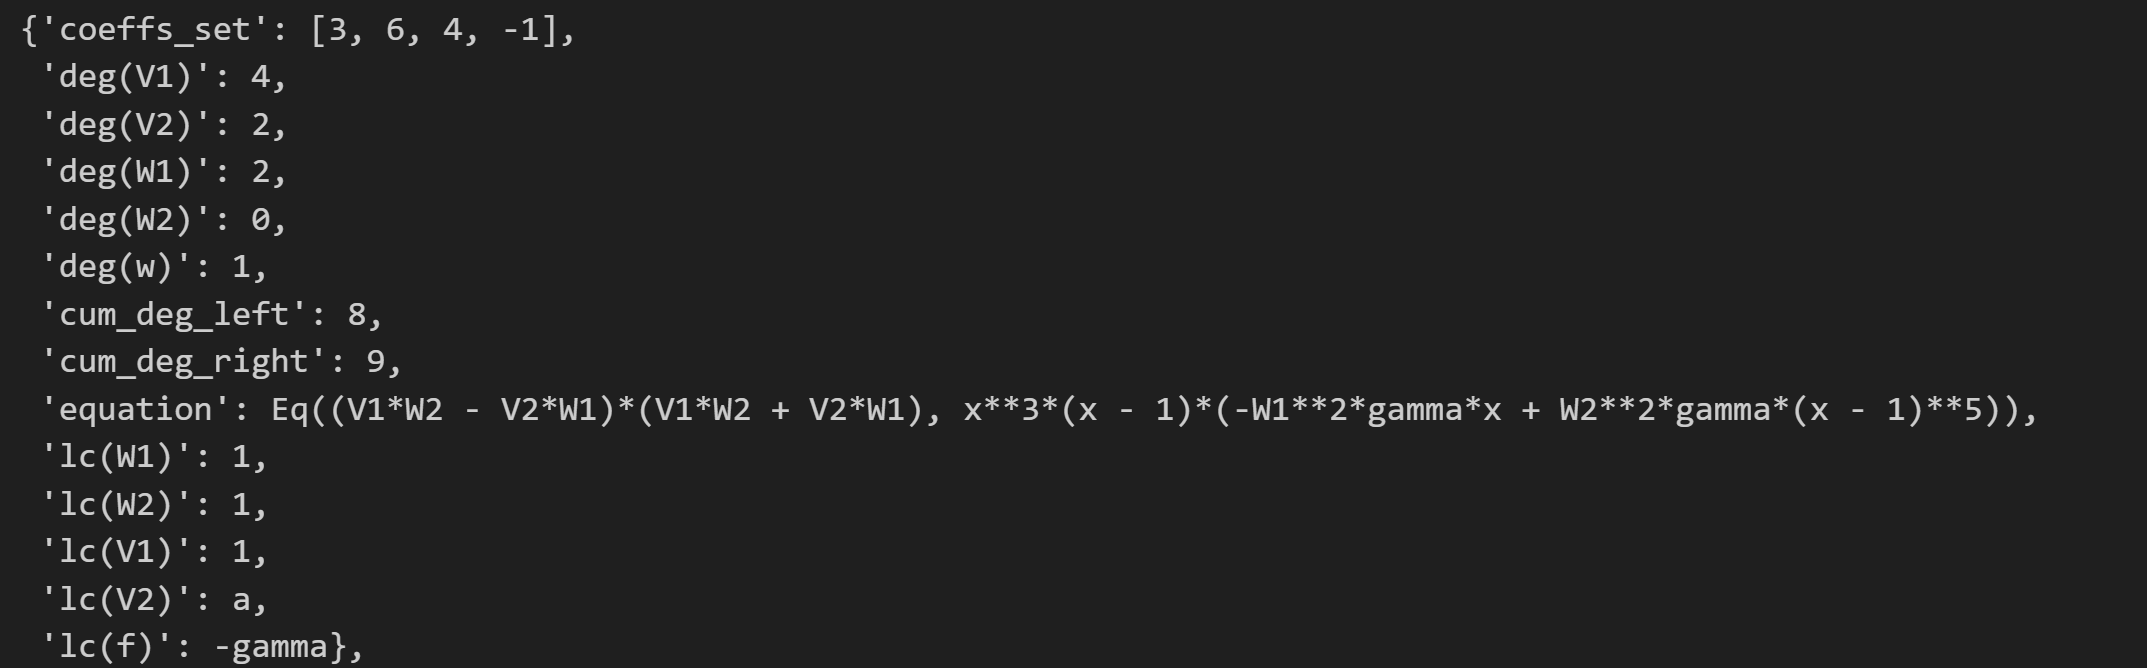

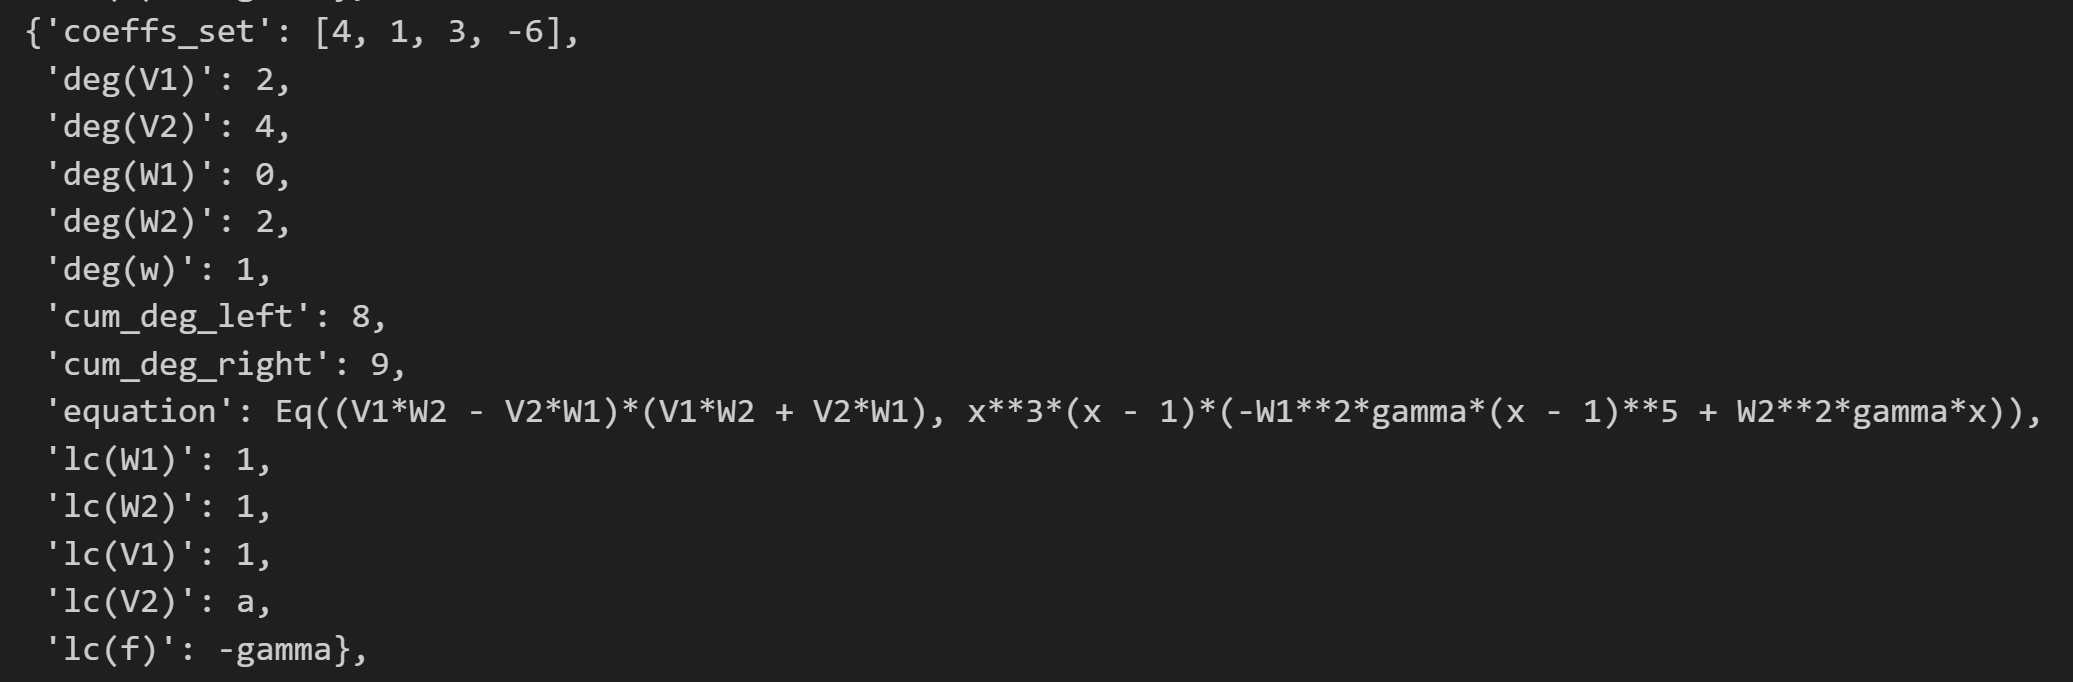

In [4]:
x, x0, x1, x2, gamma = smp.symbols('x x0 x1 x2 gamma')

In [5]:
eq_1 = smp.Poly((x - x0) * x**3, x)
eq_2 = smp.Poly(gamma * ((x - 1)*(x - x1)**4 * x - (x - 1)**6), x)

In [6]:
eq_1_expr = eq_1.as_expr().simplify()
eq_2_expr = eq_2.as_expr().simplify()

In [8]:
solutions = smp.solve(eq_2_expr.subs(x, x0))
solution_x0 = solutions[2][x0]
print(solution_x0)

Piecewise((-(10 - 6*x1**2)/(4*(4*x1 - 5)) - sqrt((10 - 6*x1**2)**2/(4*(4*x1 - 5)**2) - 2*(-(-3*(10 - 6*x1**2)**2/(8*(4*x1 - 5)**2) + (4*x1**3 - 10)/(4*x1 - 5))**3/108 + (-3*(10 - 6*x1**2)**2/(8*(4*x1 - 5)**2) + (4*x1**3 - 10)/(4*x1 - 5))*(-3888*x1**8/(65536*x1**4 - 327680*x1**3 + 614400*x1**2 - 512000*x1 + 160000) + 144*x1**7/(4*x1*(16*x1 - 20)**2 - 5*(16*x1 - 20)**2) + 25920*x1**6/(65536*x1**4 - 327680*x1**3 + 614400*x1**2 - 512000*x1 + 160000) - 6*x1**6/(64*x1**2 - 160*x1 + 100) - 480*x1**5/(4*x1*(16*x1 - 20)**2 - 5*(16*x1 - 20)**2) - 64800*x1**4/(65536*x1**4 - 327680*x1**3 + 614400*x1**2 - 512000*x1 + 160000) + 10*x1**4/(64*x1**2 - 160*x1 + 100) - 360*x1**4/(4*x1*(16*x1 - 20)**2 - 5*(16*x1 - 20)**2) + 400*x1**3/(4*x1*(16*x1 - 20)**2 - 5*(16*x1 - 20)**2) + 72000*x1**2/(65536*x1**4 - 327680*x1**3 + 614400*x1**2 - 512000*x1 + 160000) + 30*x1**2/(64*x1**2 - 160*x1 + 100) + 1200*x1**2/(4*x1*(16*x1 - 20)**2 - 5*(16*x1 - 20)**2) - 30000/(65536*x1**4 - 327680*x1**3 + 614400*x1**2 - 512000*x

In [ ]:
p1 = smp.Poly((x-solution_x0), x)
quotient_1, remainder_1 = smp.div(eq_2.subs({x0 : solution_x0}), p1)
remainder_1

In [ ]:
eq_2 = quotient_1.simplify()

In [ ]:
gamma_sol = solutions[0][gamma]
gamma_sol

In [20]:
p1 = smp.Poly((x-x0)**2, x)
eq_2 = smp.Poly(eq_2.subs(gamma, gamma_sol),x)
quotient, remainder = smp.div(eq_2, p1)

In [ ]:
quotient.simplify()

In [ ]:
remainder.simplify()

In [23]:
# condition2 = smp.Eq(eq_2.subs(x, x1), 0)

In [ ]:
eq_1

In [ ]:
eq_2

In [26]:
V1_m = (eq_1 + eq_2)/2
V2 = (-eq_1 + eq_2)/2

In [ ]:
V1_m

In [ ]:
V2

In [ ]:
solution_x1 = smp.solve(V1_m.subs(x, x0),x1)
solution = solution_x1[0]

In [ ]:
print(solution)

In [21]:
V_q = (V1_m * V1_m)

In [ ]:
V_q

In [ ]:
V_q = V_q.simplify().subs(x1, solution).simplify()

In [ ]:
V_q

In [71]:
p1 = smp.Poly((x-x0)**2,x)

quotient, remainder = smp.div(V_q, p1)

In [72]:
V1 = quotient

In [ ]:
V1.simplify()

In [ ]:
remainder

In [125]:
f = smp.Poly(V1 - x**5 * (x - 1), x)

In [ ]:
f

In [127]:
coeffs = f.all_coeffs()

In [ ]:
print(coeffs[1])

In [ ]:
eq1 = smp.Eq(coeffs[0], 0)
eq2 = smp.Eq(coeffs[1], -gamma)

# Solve the system of equations for w
solution_gamma = smp.solve([eq1, eq2], gamma)
gamma_solution = solution_gamma[0][0]
gamma_solution

In [27]:
f = f.subs(gamma, gamma_solution).simplify()

In [ ]:
print(f)

In [29]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [ ]:
f_main = factor_coeffs(f, x)
f

In [ ]:
f_main.as_expr()

In [32]:
calc = MagmaCalculator()

In [33]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [34]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [35]:
def curve_search(rang):
    for value in range(rang[0],rang[1]):
        f = f_main.subs(x0,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [37]:
curve_search([10,20])

In [ ]:
print(smp.latex(f.as_expr()))